In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


from warnings import filterwarnings

filterwarnings("ignore")
%matplotlib inline

In [47]:
df = pd.read_csv('applerevenue .csv')

In [48]:
df.columns

Index(['date', 'open', 'high', 'low', 'close', 'volume', 'profit or not'], dtype='object')

In [49]:
df.head()

,date,open,high,low,close,volume,profit or not
0,12-12-1980,0.1003,0.1007,0.1003,0.1003,469033600,0
1,15-12-1980,0.0955,0.0955,0.0951,0.0951,175884800,1
2,16-12-1980,0.0885,0.0885,0.0881,0.0881,105728000,1
3,17-12-1980,0.0902,0.0907,0.0902,0.0902,86441600,0
4,18-12-1980,0.0929,0.0933,0.0929,0.0929,73449600,0


* date-date that specified
* open-starting rate of the stock for that day
* high-the highest rate of that day
* low-the low rate of that stock at particular day
* close-the final price or rate of that stock for that at the time closing
* volume-the quantity

In [50]:
df.describe()

,open,high,low,close,volume,profit or not
count,10559.000000,10559.000000,10559.000000,10559.000000,1.055900e+04,10559.000000
mean,15.308827,15.483090,15.139373,15.318012,3.263275e+08,0.476466
std,33.973113,34.385796,33.580974,34.000790,3.201156e+08,0.499469
min,0.038800,0.038800,0.038400,0.038400,1.001504e+06,0.000000
25%,0.236800,0.242500,0.231650,0.236900,1.219792e+08,0.000000
50%,0.400200,0.406600,0.393000,0.399300,2.159780e+08,0.000000
75%,13.652700,13.783300,13.504000,13.647150,4.074518e+08,1.000000
max,181.877900,182.186600,178.382400,181.260500,2.147484e+09,1.000000


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10559 entries, 0 to 10558
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           10559 non-null  object 
 1   open           10559 non-null  float64
 2   high           10559 non-null  float64
 3   low            10559 non-null  float64
 4   close          10559 non-null  float64
 5   volume         10559 non-null  int64  
 6   profit or not  10559 non-null  int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 577.6+ KB


In [52]:
df.isnull().sum()

date             0
open             0
high             0
low              0
close            0
volume           0
profit or not    0
dtype: int64

In [53]:
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y')
df.sort_values('date', inplace=True)

In [54]:
df.corr()

,date,open,high,low,close,volume,profit or not
date,1.000000,0.636854,0.636432,0.637213,0.636794,0.161642,0.018328
open,0.636854,1.000000,0.999941,0.999926,0.999844,-0.219316,-0.000861
high,0.636432,0.999941,1.000000,0.999913,0.999926,-0.218785,-0.003254
low,0.637213,0.999926,0.999913,1.000000,0.999928,-0.220155,-0.003508
close,0.636794,0.999844,0.999926,0.999928,1.000000,-0.219485,-0.006072
volume,0.161642,-0.219316,-0.218785,-0.220155,-0.219485,1.000000,0.019101
profit or not,0.018328,-0.000861,-0.003254,-0.003508,-0.006072,0.019101,1.000000


<Axes: >

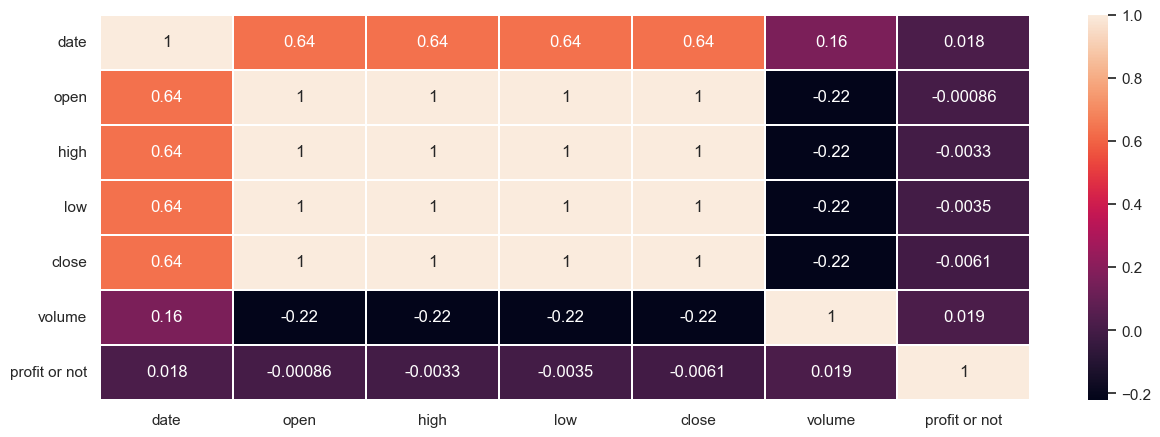

In [55]:
plt.subplots(figsize=(15, 5))
sns.heatmap(df.corr(), linewidths=.1, annot=True)

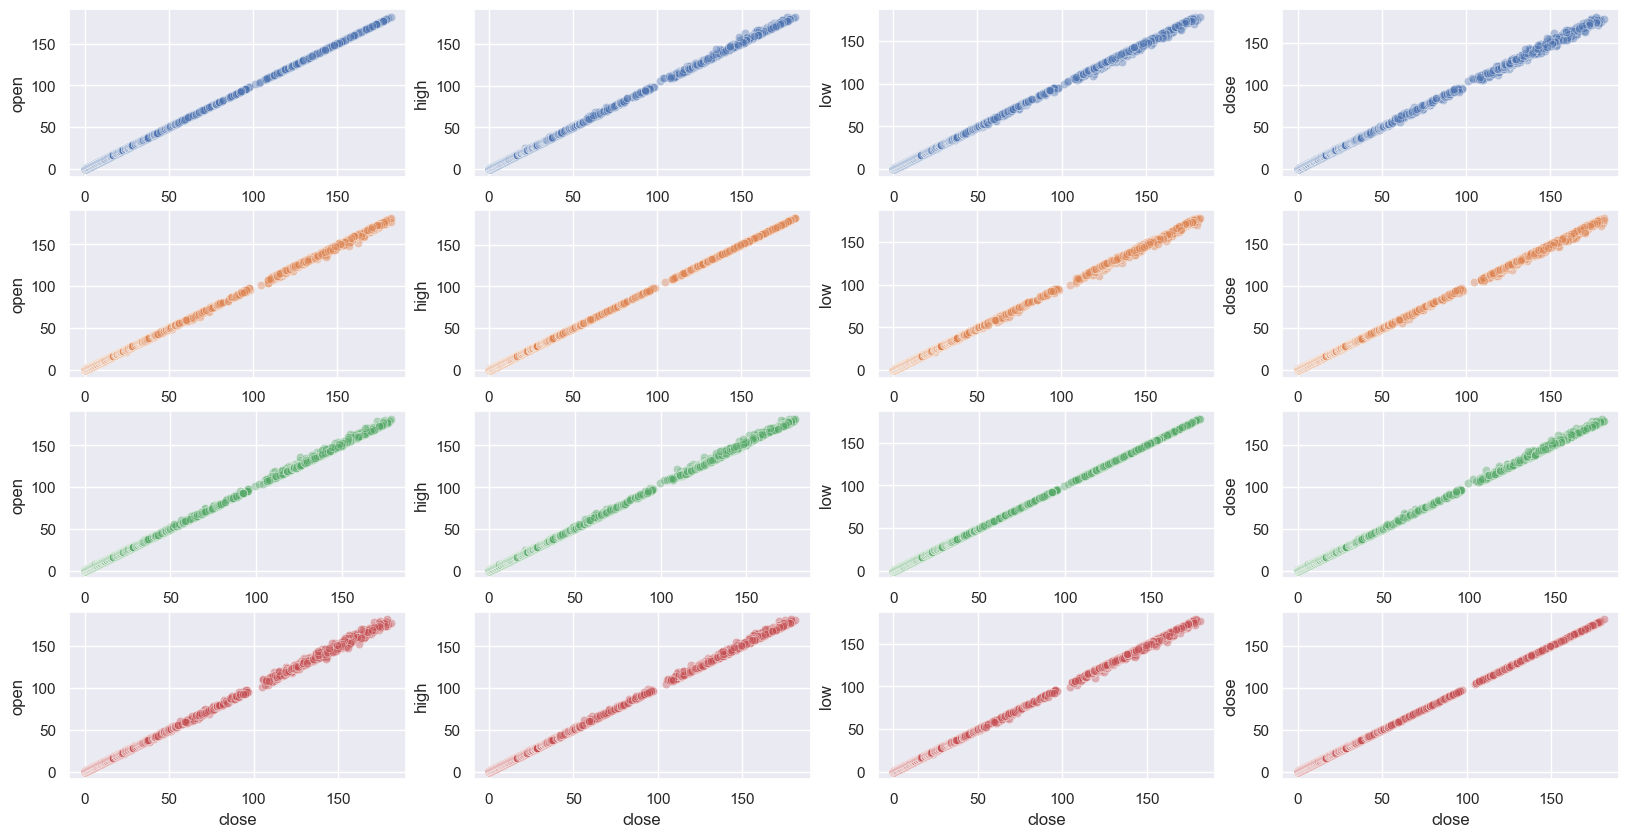

In [56]:
plt.subplots(4,4,figsize=(20, 10))
n = 0
for x, c in zip(['open','high','low','close'], list(sns.color_palette())):
    for y in ['open','high','low','close']:
        plt.subplot(4,4,n+1)
        sns.scatterplot(x = x, y = y, data = df, color = c, alpha = 0.4)
        n += 1

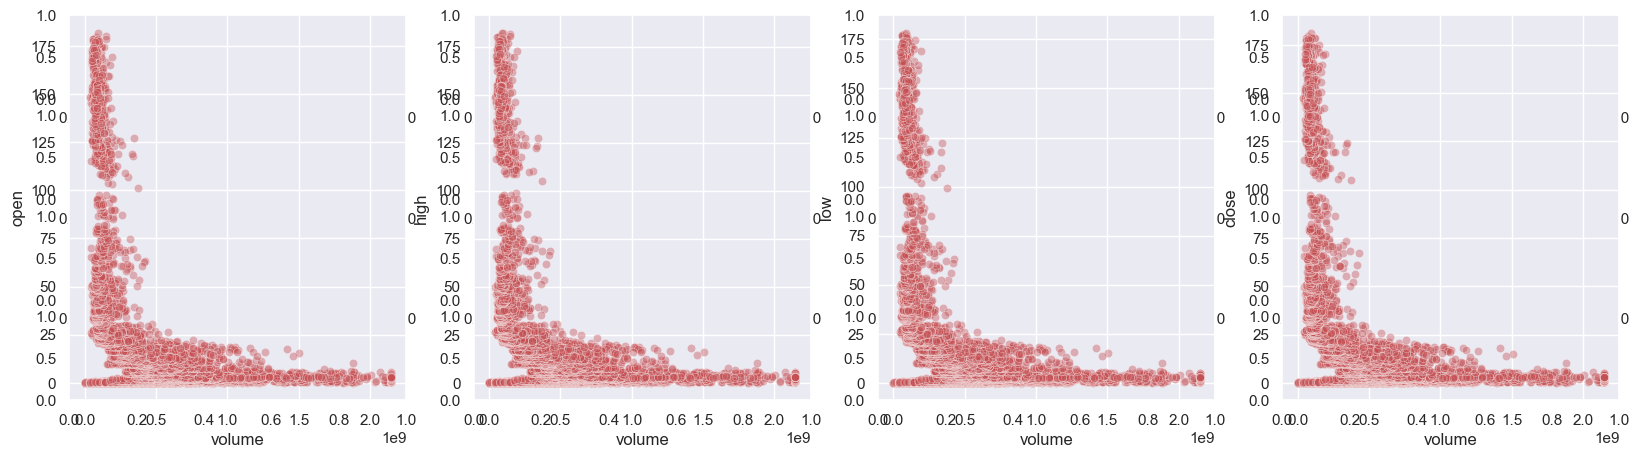

In [57]:
plt.subplots(4,4,figsize=(20, 5))
for idx, col in enumerate(['open','high','low','close']):
        plt.subplot(1,4,idx+1)
        sns.scatterplot(x = 'volume', y = col, data = df, color = c, alpha = 0.4)

In [58]:
X = df.drop(columns=['date', 'profit or not', 'volume'])
Y = df['profit or not']
X.head()

,open,high,low,close
0,0.1003,0.1007,0.1003,0.1003
1,0.0955,0.0955,0.0951,0.0951
2,0.0885,0.0885,0.0881,0.0881
3,0.0902,0.0907,0.0902,0.0902
4,0.0929,0.0933,0.0929,0.0929


In [59]:
sns.set_theme(style="darkgrid")

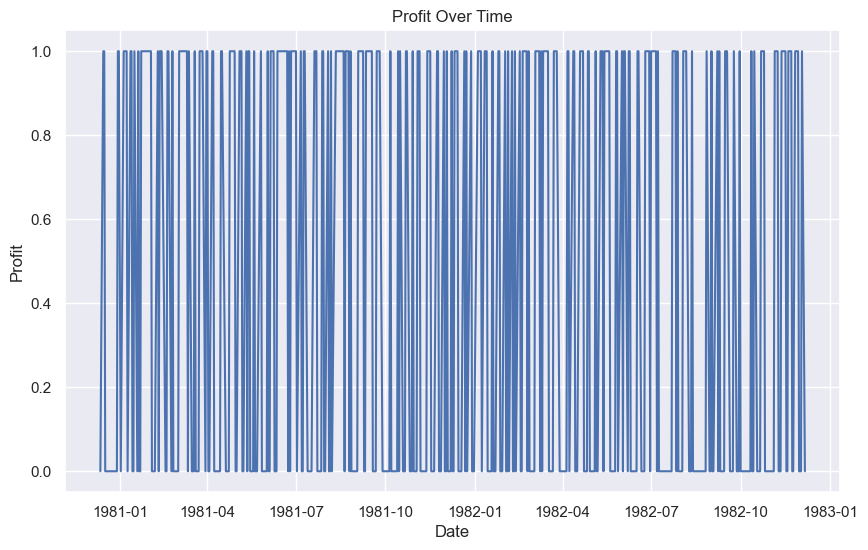

In [60]:
plt.figure(figsize=(10, 6)) 
sns.lineplot(x='date', y='profit or not', data=df.iloc[:500])

# Personalizar la gráfica
plt.title('Profit Over Time')
plt.xlabel('Date') 
plt.ylabel('Profit')

# Mostrar la gráfica
plt.show()

In [61]:
df['year'] = df['date'].dt.year

In [62]:
annual_profit_avg = df.groupby('year')['profit or not'].mean().reset_index()

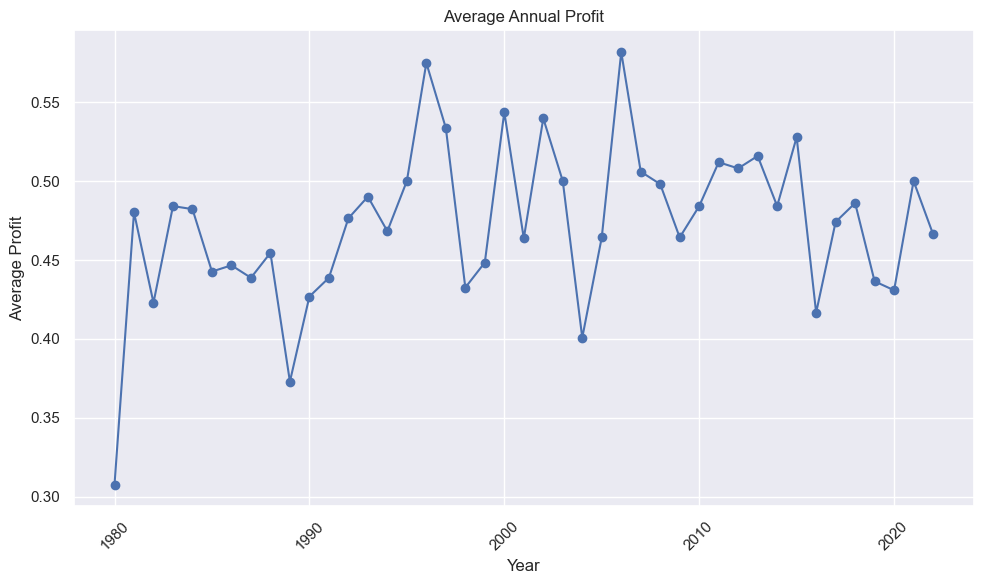

In [63]:
# Configurar Seaborn para mejorar la estética de las gráficas
sns.set_theme(style="darkgrid")

# Crear la gráfica
plt.figure(figsize=(10, 6))  # Ajusta el tamaño según necesites

# Usar un gráfico de línea para mostrar el promedio de 'Profit' por año
plt.plot(annual_profit_avg['year'], annual_profit_avg['profit or not'], marker='o', linestyle='-', color='b')

# Añadir títulos y etiquetas
plt.title('Average Annual Profit')
plt.xlabel('Year')
plt.ylabel('Average Profit')
plt.xticks(rotation=45)  # Rota las etiquetas del eje x para mejor legibilidad

# Mostrar la gráfica
plt.tight_layout()  # Ajusta automáticamente los parámetros de subtramas para dar espacio alrededor de las etiquetas
plt.show()


Decision Tree

In [64]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.1)
(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

((9503, 4), (1056, 4), (9503,), (1056,))

In [67]:
model = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
model.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [68]:
prediction = model.predict(x_test)
print('Model accuracy score {0:0.5f}'.format(accuracy_score(y_test, prediction)))

Model accuracy score 0.51799


In [69]:
#Taking into account volume
X = df[['open','high','low','close', 'volume']]
y = df['profit or not']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=40, test_size = 0.1)
model = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
model.fit(X_train, y_train)
prediction = model.predict(X_test)
print('Model accuracy score {0:0.5f}'.format(accuracy_score(y_test, prediction)))

Model accuracy score 0.54356


Logistic Regression

In [74]:
X = df[['open','high','low','close']]
y = df['profit or not']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=40, test_size = 0.1)
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [75]:
prediction = model.predict(X_test)
print('Model accuracy score {0:0.5f}'.format(accuracy_score(y_test, prediction)))

Model accuracy score 0.82386


In [78]:
X_test

,open,high,low,close
1552,0.1936,0.1936,0.1897,0.1919
7701,9.7246,10.1134,9.6996,10.0993
6875,3.9601,3.9729,3.7869,3.8604
119,0.1120,0.1125,0.1120,0.1120
1364,0.1099,0.1156,0.1099,0.1151
...,...,...,...,...
7798,12.1038,12.2233,12.0202,12.0522
9565,46.0402,47.1204,45.7889,46.7725
3833,0.2143,0.2172,0.2134,0.2163
8672,28.9972,29.0650,28.4609,28.4654


In [73]:
# X = df[['open','high','low','close','volume']]
# y = df['profit or not']
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=40, test_size = 0.1)
# model = LogisticRegression()
# model.fit(X_train, y_train)
# prediction = model.predict(X_test)
# print('Model accuracy score {0:0.5f}'.format(accuracy_score(y_test, prediction)))
# TODO DON'T USE volume

Model accuracy score 0.54167


In [76]:
import pickle

In [77]:
with open('revenue_apple_model.pickle', 'wb') as archivo:
    pickle.dump(model, archivo)